In [56]:
import numpy as np
import pandas as pd
import shap
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression


In [77]:
n = 1000
#Define data using probabilities given
p_00, p_01, p_10, p_11 = 0.1, 0.0, 0.4, 0.5
p_00, p_01, p_10, p_11 = 0.25, 0.25, 0.25, 0.25
X = (int(n * p_00) * [[0,0]] +
     int(n * p_01) * [[0,1]] +
     int(n * p_10) * [[1,0]] +
     int(n * p_11) * [[1,1]])

# Create target data; y_m = 1 for all men, y_b = 1 for men who can lift
y_m = (int(n * p_00) + int(n * p_01))                 * [0] + (int(n * p_10) + int(n * p_11)) * [1]
y_b = (int(n * p_00) + int(n * p_01) + int(n * p_10)) * [0] + (              + int(n * p_11)) * [1]
#X, y_m, y_b  = np.array(X), np.array(y_m), np.array(y_b)
X, y_m, y_b  = pd.DataFrame(X, columns=['Male', 'Lifter']), np.array(y_m), np.array(y_b)
y = y_b


In [78]:
cats = ['Male', 'Lifter']
preprocesor = ColumnTransformer(transformers=[('cat', OneHotEncoder(), cats)])


In [79]:
model = Pipeline([('preprocessor', preprocesor), ('classifier', LogisticRegression(max_iter=10000))])
model.fit(X, y)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Male', 'Lifter'])])),
                ('classifier', LogisticRegression(max_iter=10000))])

In [80]:
ex = shap.Explainer(model.predict_proba, X)
shap_values = ex(X)

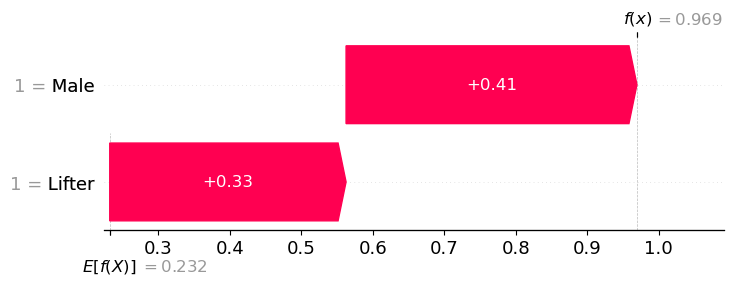

In [84]:
shap.plots.waterfall(shap_values[800, :, 1])

In [69]:
X

,Male,Lifter
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
995,1,1
996,1,1
997,1,1
998,1,1


In [64]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,